# Physics 77/88 - Fall 2024 - Homework 5 
## Random Numbers I
*Submit this notebook to bCourses to receive a credit for this assignment.*
<br>
due: **Oct 23rd 2024** 
<br>
**Please upload both, the .ipynb file and the corresponding .pdf**
<br>
## Problem 1 (20P)

Write a function **random_machine.py** using *def* that simulates the following process: You start with a set of $N$ dice all showing the same number, i. e. pips or *states*, face up (see image below). Now, you pick one die randomly and roll it and put it back. In the next step you pick a die randomly again, roll it and put it back and so on.

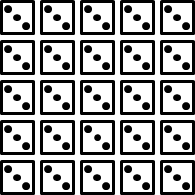

For each time step, calculate the **Entropy S** <br>
<br>
$S = - \Sigma_{i=1}^{6}\,\,p_i\, ln(p_i)$<br>
<br>
of the system, where $p_i = n_i/N$<br>
<br>
with $n_i$ being the number of those dice showing the number $i$ face up (= having the same state *i*) at the particular time step $t$.<br>
<br>
The function also generates a plot of $S$ over time, compared to the maximum value of $S = ln(6)$, similar to the figure below:<br>
<br>
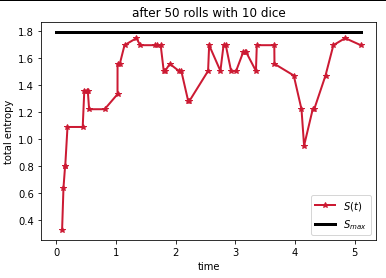
<br>
and a histogram of the states of the dice after $M$ rolls, like e.g. in the figure below:<br>
<br>
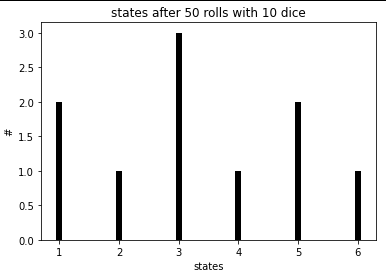
<br>
The number of dice $N$ and the number of rolls $M$, which is equivalent to the number of time steps, should both be input arguments.<br>
 - How does the entropy $S$ evolve in time for small $N = 5, 10, 15$ and for large $N>100$?<br>
 - How do you interpret this behaviour, what are possible conclusions?<br>
 - How does the entropy $S$ evolve in time if you start with a random configuration of the dice's states?

<br>

In [3]:
import numpy as np
import matplotlib.pyplot as plt

#function illustrates the increase of entropy by rolling ONE die among N 
#dice each of M time steps by starting with a homogenious set and evolving
#with a poissonian time keeper (Gillespie alg)

def random_machine(N, M):
    
    I = 6 #number of states: I = 6 for a die

    #N dice, all set to state "three" for t=1
    Dice    = 3*np.ones((N,M))
    Entropy = np.zeros((M))
    
    Emax    = np.log(I)#max entropy
    e_calc  = np.zeros((I))
    
    #SETTING TIME
    #generate M random numbers between 0 and 1 (uniformly dist)
    R      =  np.random.uniform(0,1,(M,1))
    Tau    = -np.log(R)/N
    T      = np.cumsum(Tau)
    
    #generate M random numbers between 0 and N-1 (uniformly dist)
    #for choosing die for every time step
    R_dice = np.random.randint(0,N,(M))
    
    #SETTING STATE of one randomly choosen die
    #generate M random numbers between 1 and I (uniformly dist)
    R_state = np.random.randint(1,I+1,(M))
    #choose die
    for i in range(M):#over time
        idx_die           = R_dice[i]
        Dice[idx_die, i:] = R_state[i]
        
        #calculating entropy
        for j in range(I):
            e_calc[j] = (Dice[:,i] == j+1).sum()/N + 1e-300 #avoiding log(0)
            
            
        Entropy[i] =  -np.dot(e_calc,np.log(e_calc))
        
    
    #plotting histogram of states
    labels, counts = np.unique(Dice[:,-1], return_counts = True)
    plt.bar(labels, counts, align = 'center', width = 0.1, color = 'k')
    plt.gca().set_xticks(labels)
    plt.xlabel('states')
    plt.ylabel('#')
    plt.title('states after ' + str(M) + ' rolls with ' + str(N) + ' dice')
    plt.show()
    
    #plotting evolution of entropy
    plt.plot(T, Entropy, '-*', linewidth = 2, color = [0.8, 0.1, 0.2],\
             label = '$S(t)$')
    plt.plot([0, T[-1]], [Emax, Emax], 'k-', linewidth = 3, label = '$S_{max}$')
    plt.xlabel('time')
    plt.ylabel('total entropy')
    plt.title('after ' + str(M) + ' rolls with ' + str(N) + ' dice')
    plt.legend()
    plt.show()

    return Dice

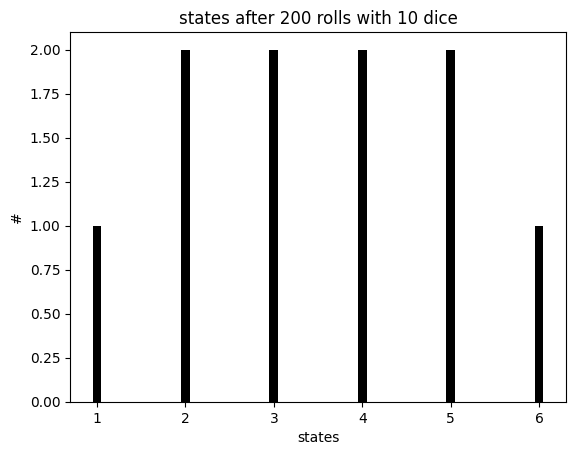

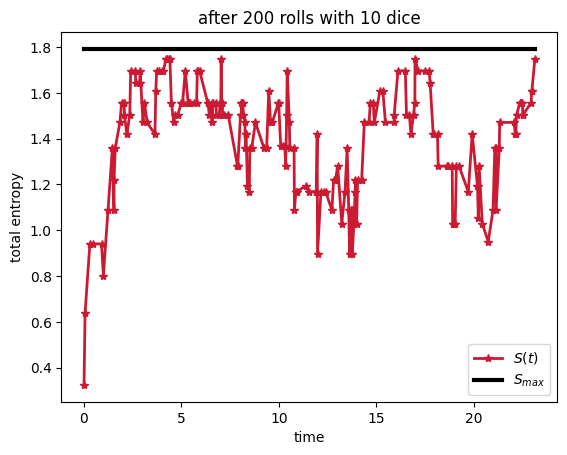

In [8]:
D = random_machine(10,200)

- for small $N$ entropy fluctuates, for large $N$, entropy inevitably reaches its maximum<br>
- it is a pure statistical process that the entropy of a *"macroscopic"* system ($N>100$) increases over time (= thermodynamical arrow of time). Since $S$ is a statistical quantity, it is dominated by fluctuations for small $N$, hence there is no arrow of time for *"microscopic"* systems (time symmetry)
- we observe the same process, but start at a high entropy state already so that the behaviour is less pronounced 